# ***Import Libraries:***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# ***Part 1: Data Loading and Preprocessing***

***1. Load the Dataset:***

In [ ]:
data = pd.read_csv('Netflix_Userbase.csv')

 ***2. Handle Missing Values:***

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()

print("Columns with missing values:")

Columns with missing values:


***3. Encode Categorical Variables:***

In [ ]:
#DataFrame and 'columns_to_encode' are the categorical columns
columns_to_encode = ['Subscription Type', 'Country', 'Gender', 'Device']

# One-hot encode categorical columns
data_encoded = pd.get_dummies(data, columns=columns_to_encode)

print(data_encoded.head())

   User ID  Monthly Revenue Join Date Last Payment Date  Age Plan Duration  \
0        1               10  15-01-22          10-06-23   28       1 Month   
1        2               15  05-09-21          22-06-23   35       1 Month   
2        3               12  28-02-23          27-06-23   42       1 Month   
3        4               12  10-07-22          26-06-23   51       1 Month   
4        5               10  01-05-23          28-06-23   33       1 Month   

   Subscription Type_Basic  Subscription Type_Premium  \
0                        1                          0   
1                        0                          1   
2                        0                          0   
3                        0                          0   
4                        1                          0   

   Subscription Type_Standard  Country_Australia  ...  Country_Mexico  \
0                           0                  0  ...               0   
1                           0             

***4. Feature Selection:***

In [ ]:
# Separate the target variable
X = data_encoded.drop(columns=['Monthly Revenue'])
y = data_encoded['Monthly Revenue']

# Handling missing values and encoding categorical variables
numeric_features = ['Age']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['Subscription Type', 'Country', 'Gender', 'Device']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ('scaler', StandardScaler())])  # Scale one-hot encoded features

# Column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# ***Part 2: Exploratory Data Analysis (EDA)***

***1. Descriptive Statistics:***

In [ ]:
print(data.describe())

          User ID  Monthly Revenue          Age
count  2500.00000      2500.000000  2500.000000
mean   1250.50000        12.508400    38.795600
std     721.83216         1.686851     7.171778
min       1.00000        10.000000    26.000000
25%     625.75000        11.000000    32.000000
50%    1250.50000        12.000000    39.000000
75%    1875.25000        14.000000    45.000000
max    2500.00000        15.000000    51.000000


***2. Visualizations***

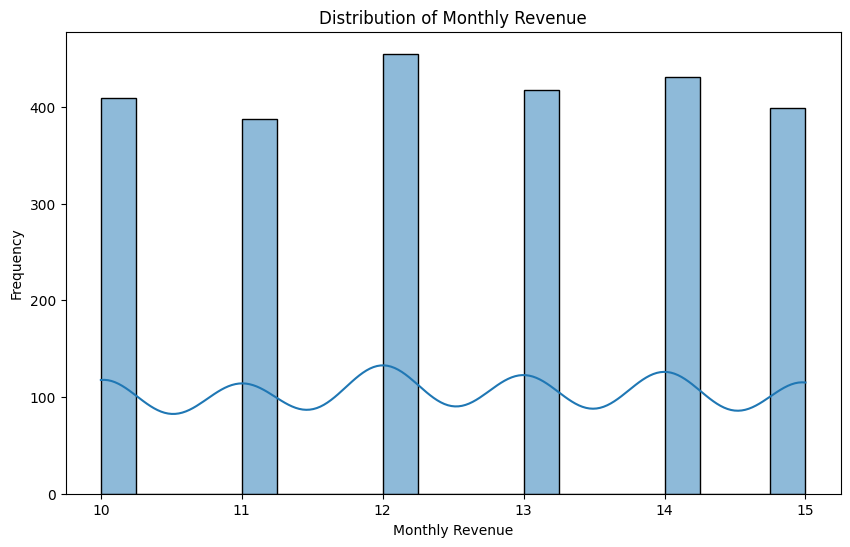

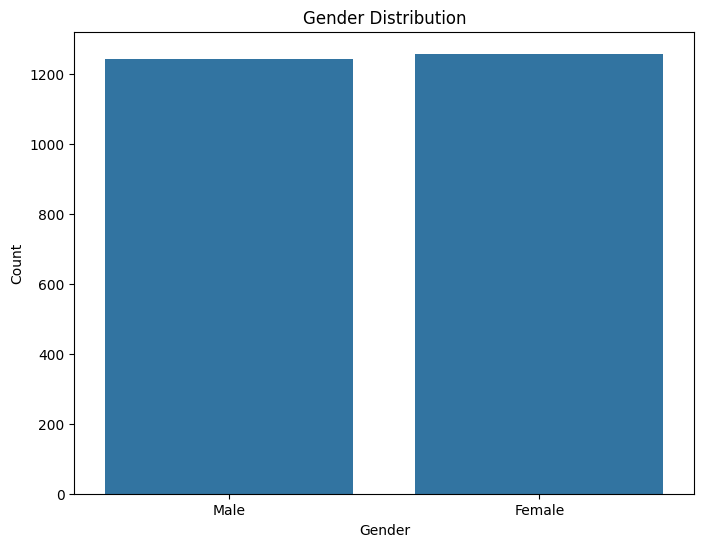

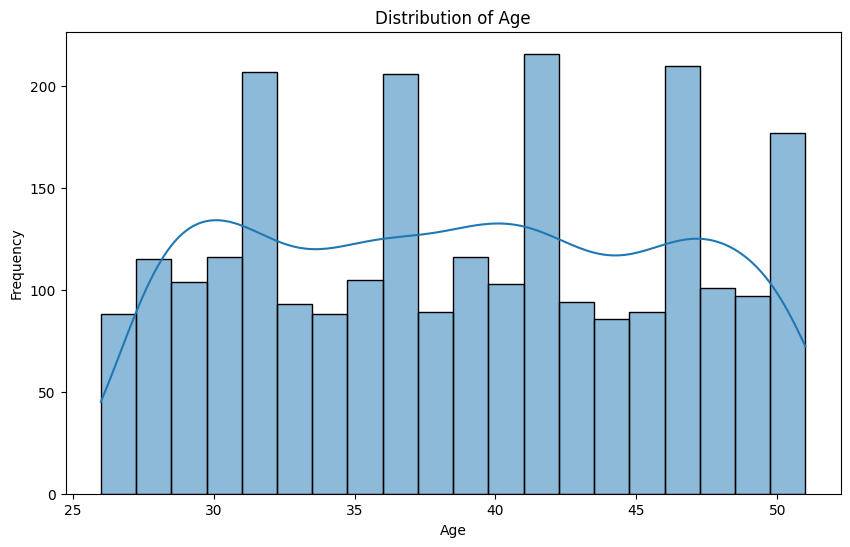

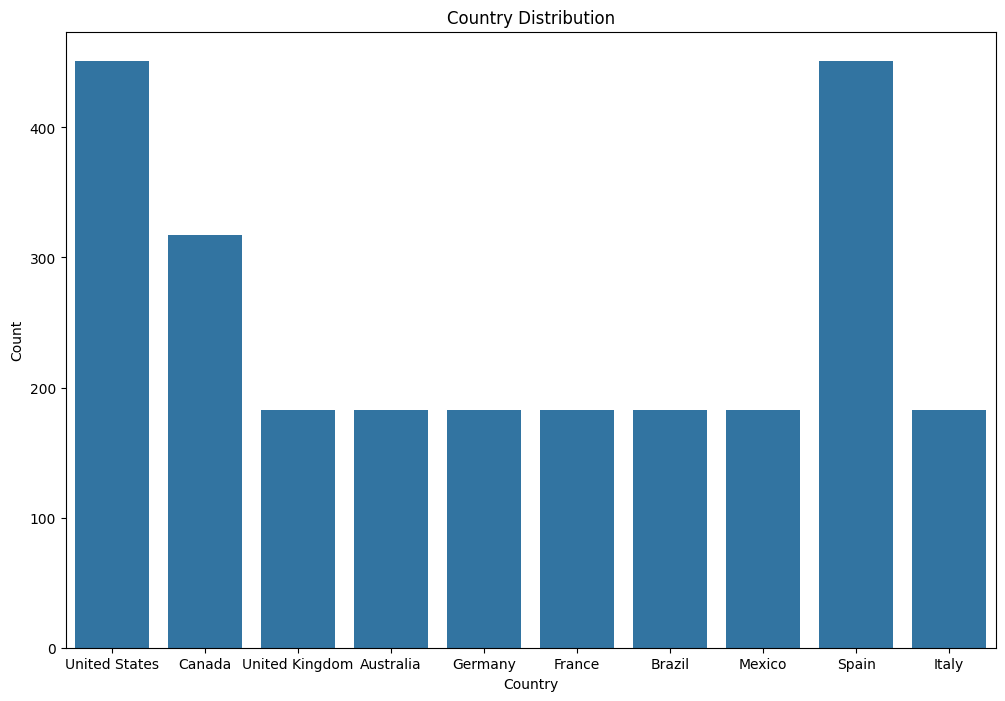

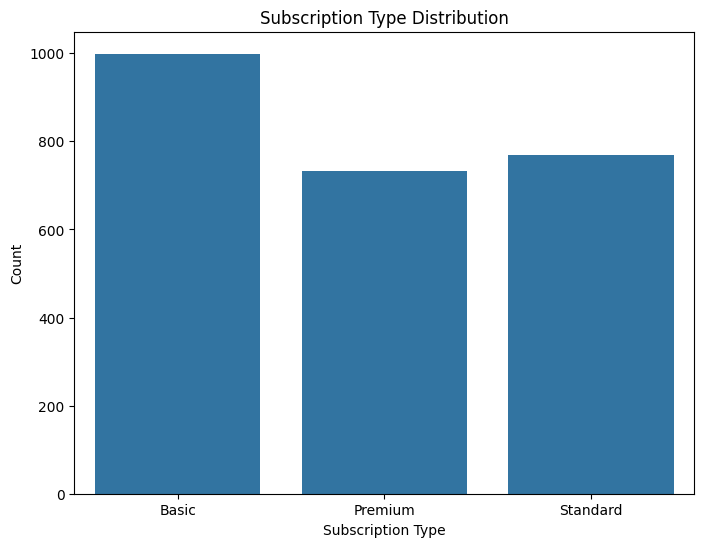

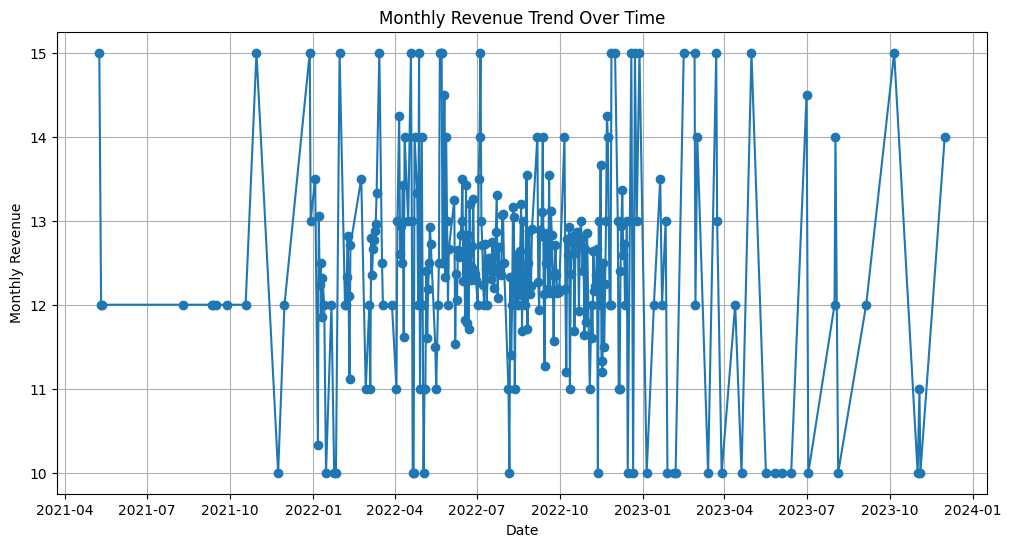

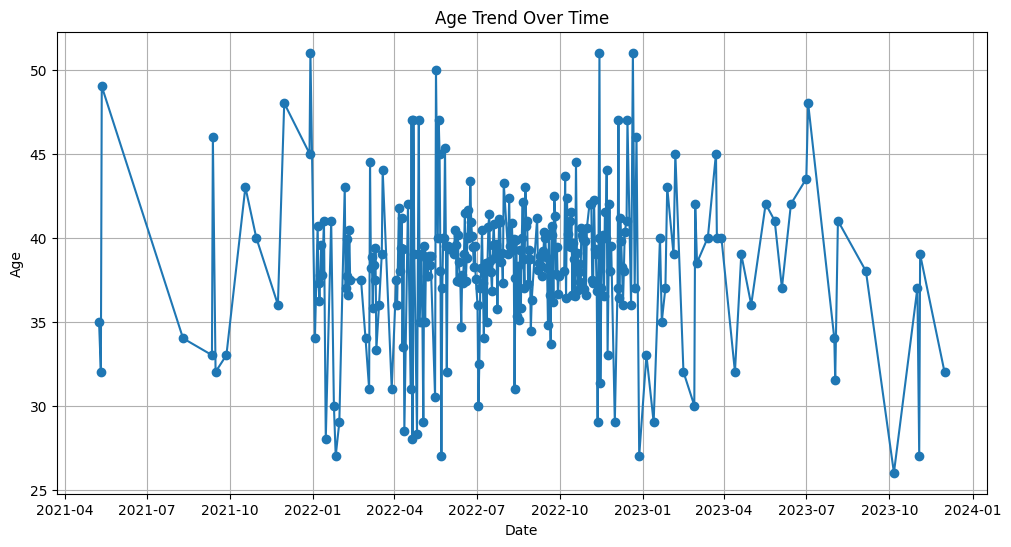

In [ ]:
# Distribution of Monthly Revenue
plt.figure(figsize=(10, 6))
sns.histplot(data['Monthly Revenue'], bins=20, kde=True)
plt.title('Distribution of Monthly Revenue')
plt.xlabel('Monthly Revenue')
plt.ylabel('Frequency')
plt.show()

# Gender Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Country Distribution
plt.figure(figsize=(12, 8))
sns.countplot(x='Country', data=data)
plt.title('Country Distribution')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

# Subscription Type Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Subscription Type', data=data)
plt.title('Subscription Type Distribution')
plt.xlabel('Subscription Type')
plt.ylabel('Count')
plt.show()

# Convert 'Join Date' to datetime format
data['Join Date'] = pd.to_datetime(data['Join Date'])

# Monthly Revenue trend
monthly_revenue_trend = data.groupby('Join Date')['Monthly Revenue'].mean()
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue_trend.index, monthly_revenue_trend.values, marker='o')
plt.title('Monthly Revenue Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Monthly Revenue')
plt.grid(True)
plt.show()

# Age trend
age_trend = data.groupby('Join Date')['Age'].mean()
plt.figure(figsize=(12, 6))
plt.plot(age_trend.index, age_trend.values, marker='o')
plt.title('Age Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Age')
plt.grid(True)
plt.show()



# ***Part 3: Linear Regression Model (Predicting Monthly Revenue)***



***1. Build the Model:***

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline for preprocessing
numeric_features = ['Age']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

# Add the preprocessor to the pipeline
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', RandomForestRegressor())])

# Train the model
rf_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = rf_pipeline.predict(X_test)



***2. Model Evaluation:***

In [ ]:
# Evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R-squared:", r2)
print("RMSE:", rmse)

R-squared: -0.02482633380007493
RMSE: 1.6824774015908446




# ***Part 4: Logistic Regression Model (Predicting Customer Feedback)***




***1.	Model Building:***

In [ ]:
# Generate synthetic data for the Feedback column
np.random.seed(42)
data['Feedback'] = np.random.choice([0, 1], size=len(data['Age']))

#Creating dataframe
data_df = pd.DataFrame(data)

# Separate features and target variable
X = data_df[['Age', 'Gender', 'Subscription Type', 'Monthly Revenue']]
y = data_df['Feedback']

# One-hot encode categorical variables
column_trans = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(), ['Gender', 'Subscription Type'])], remainder='passthrough')
X_encoded = column_trans.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train a logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

***2. Evaluation:***

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.516
Precision: 0.5208333333333334
Recall: 0.4
F1 Score: 0.4524886877828055
Confusion Matrix:
 [[158  92]
 [150 100]]


# ***Part 5: Comparative Analysis and Visualization***


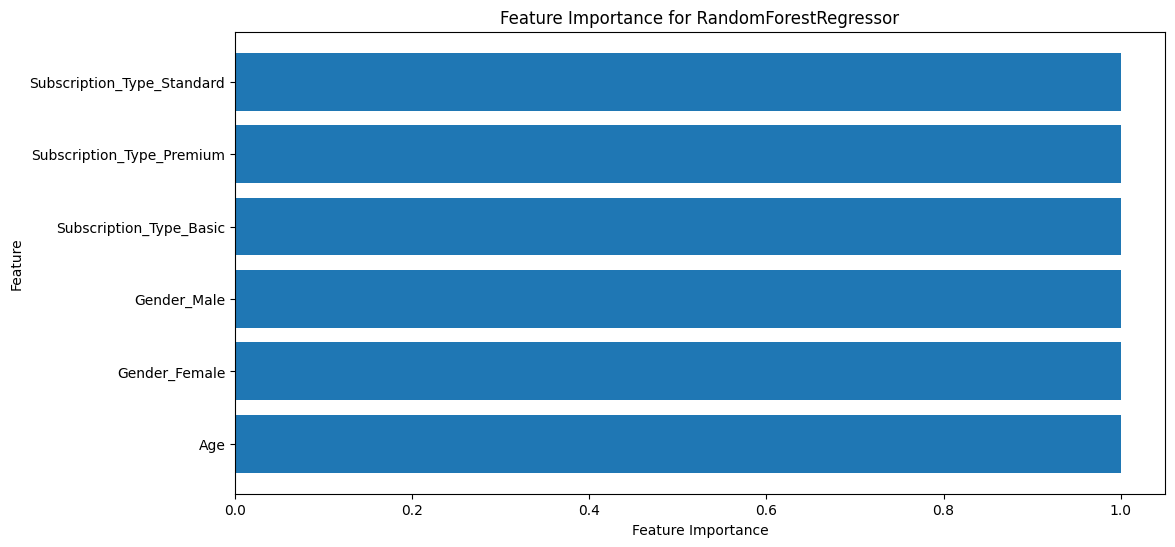

In [ ]:
# Combine numeric and encoded categorical columns
all_feature_names = ['Age'] + list(encoded_columns)

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.barh(all_feature_names, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for RandomForestRegressor')
plt.show()

***Insights:***

<ipython-input-107-d6b42c496ce9>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_encoded.corr()


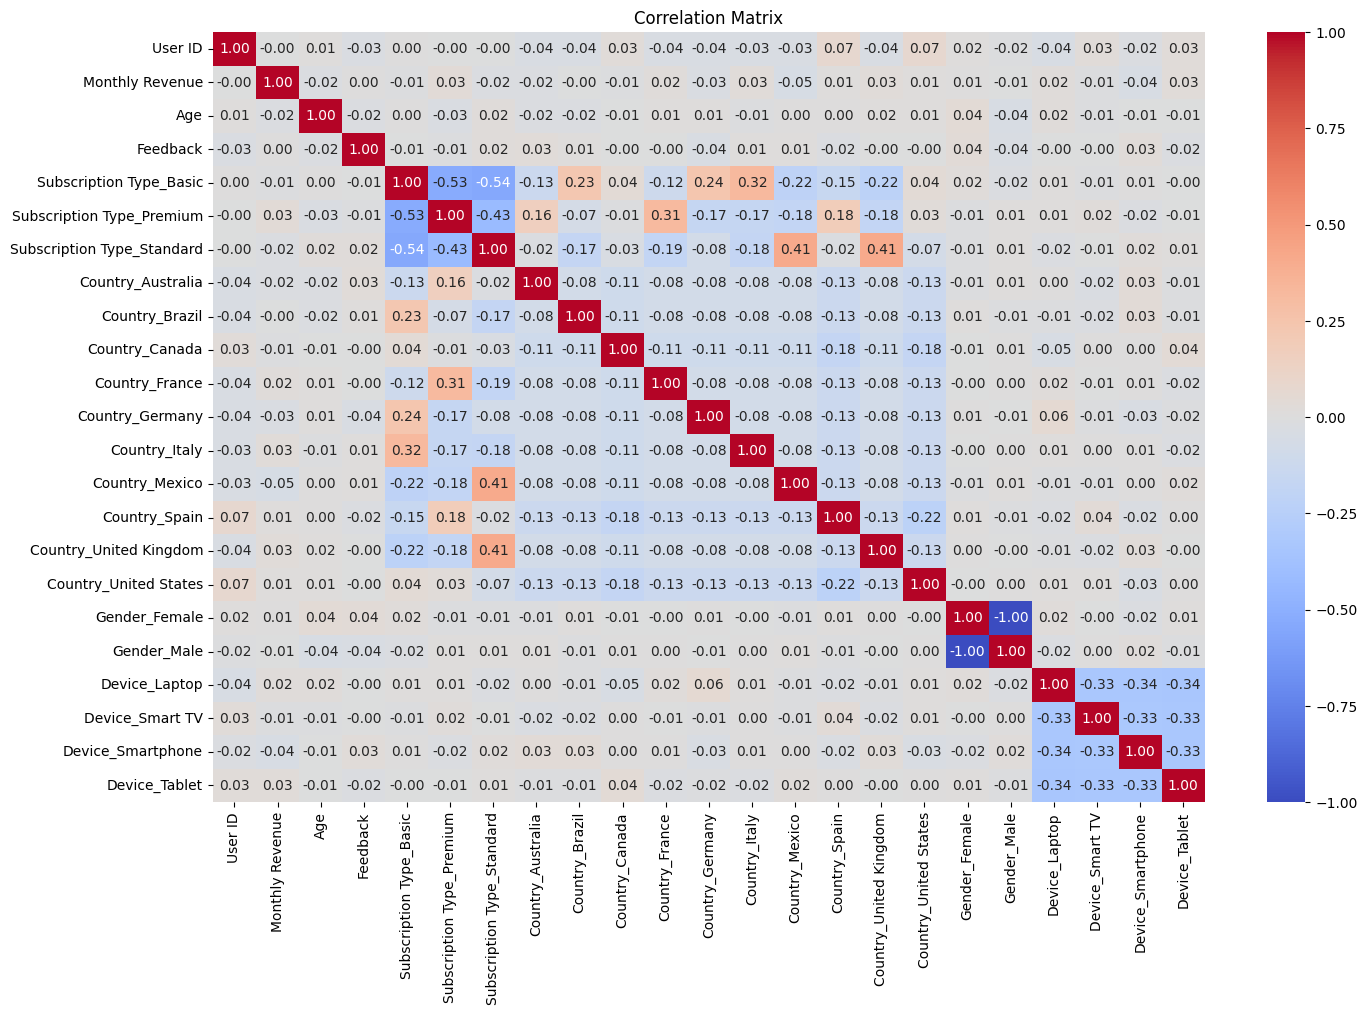

In [ ]:
# Add the 'Feedback' column to the encoded DataFrame
data_encoded['Feedback'] = data['Feedback']

# Calculate the correlation matrix
correlation_matrix = data_encoded.corr()

# Plotting the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()